# Numerical Simulation of the Steady-State Approximation

This notebook contains Python code that simulates the following reaction:

\begin{equation}
\mathrm{A}\underset{k_{-1}}{\overset{k_1}\leftrightarrows}\mathrm{B}\overset{k_2}\rightarrow{C}
\end{equation}

Starting from a set of initial concentrations and the rate constants, the simulation calculates how the concentrations change with time. The initial concentrations and rate constants are specified in one of the code cells below, and you can change these to explore how this affects the reaction kinetics.

To run the simulation, click on **Cell > Run All** from the menu.

As the simulation runs, the reagent concentrations and the rates of change of these concentrations are collected. After the simulation has finished, these data are used to generate three plots:

1. The concentrations of A, B, and C as a function of time.

2. The rate of change of the concentration of B.  
The steady-state approximation assumes that a short-lived intermediate is consumed at the same rate it is formed. Mathematically, the rate of change of this intermediate is assumed to be equal to zero.

3. The rate of change of the concentration of the product, C, and the **negative** rate of change of the primary reactant, A.  
The algebraic techniques you have learned in your lectures and tutorials can be used to show that if the steady-state approximation holds then these two rates are equal. Comparing the rates from the simulation gives a way to visually check when (and if) the steady-state approximation is valid.

One advantage of using computational simulation techniques to look at this problem is that we have direct access to the rates of change of the three substances A, B, and C. These rates are key concepts in the theory of reaction kinetics, but cannot be directly measured in experiments.

More information about *how* the simulation works (both the maths and the code) is at the bottom of the notebook → [How does it work?](#how)

In [1]:
# import numpy for handling arrays, and matplotlib.pyplot to generate plots
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'retina' # uncomment for high-DPI screens

In [2]:
## simulation input parameters ##

# initial concentrations of A, B, and C
c_A0 = 10.0
c_B0 = 0.0
c_C0 = 0.0

# reation rates, k_1, k_minus_1, and k_2
k1 = 3.0
km1 = 2.0
k2 = 10.0

In [3]:
# functions defining the rate equations for [A], [B], and [C]
def d_A_by_d_t( c_A, c_B, k1, km1 ):
    return ( - k1  * c_A
             + km1 * c_B )

def d_B_by_d_t( c_A, c_B, k1, km1, k2 ):
    return ( + k1  * c_A
             - km1 * c_B  
             - k2  * c_B )

def d_C_by_d_t( c_B, k2 ):
    return ( + k2 * c_B )

In [4]:
# "Technical" Simulation Parameters
# delta_t is the time between simulation timesteps
delta_t = 1e-2
# the simulation is run for n_steps steps.
n_steps = 200
# so the total simulation time is n_steps * delta_t

In [5]:
# create arrays to store [A], [B], and [C] (and d[B]/dt) during the simulation
store_c_A          = np.zeros( n_steps )
store_c_B          = np.zeros( n_steps )
store_c_C          = np.zeros( n_steps )

store_d_c_A_by_d_t = np.zeros( n_steps )
store_d_c_B_by_d_t = np.zeros( n_steps )
store_d_c_C_by_d_t = np.zeros( n_steps )

In [6]:
# Run the Simulation

# set the concentrations of A, B, and C to the initial concentrations
c_A = c_A0
c_B = c_B0
c_C = c_C0

# now loop over n_steps timesteps.
for step in range( n_steps ): 
    # store the concentrations at this simulation step so that we can plot them later
    store_c_A[ step ] = c_A
    store_c_B[ step ] = c_B
    store_c_C[ step ] = c_C

    # store the rate of change of [A], [B], and [C] at this simulation step so that we can plot them later
    store_d_c_A_by_d_t[ step ] = d_A_by_d_t( c_A, c_B, k1, km1 )
    store_d_c_B_by_d_t[ step ] = d_B_by_d_t( c_A, c_B, k1, km1, k2 )
    store_d_c_C_by_d_t[ step ] = d_C_by_d_t( c_B, k2 )
    
    # calculate the concentrations at t + Δt
    # each concentration is changed by ( d[x]/dt × Δt )
    c_A += store_d_c_A_by_d_t[ step ] * delta_t
    c_B += store_d_c_B_by_d_t[ step ] * delta_t
    c_C += store_d_c_C_by_d_t[ step ] * delta_t

In [7]:
# we want to plot our simulation data against time, 
# so we generate an array of times at every simulation step
time = np.arange( n_steps ) * delta_t

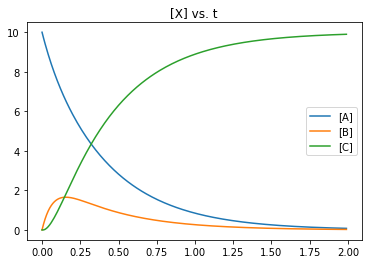

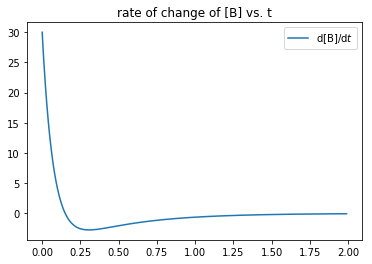

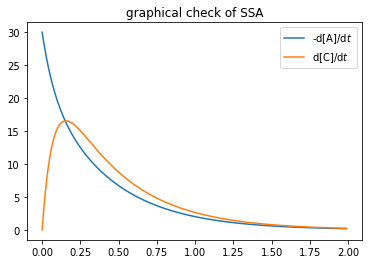

In [8]:
## plot the simulation data ##

# plot [X] vs. time
plt.plot( time, store_c_A, label='[A]' )
plt.plot( time, store_c_B, label='[B]' )
plt.plot( time, store_c_C, label='[C]' )
plt.legend()
plt.title('[X] vs. t')
plt.show()

# plot the rate of change of [B]
plt.plot( time, store_d_c_B_by_d_t, label=r'd[B]/d$t$' )
plt.legend()
plt.title('rate of change of [B] vs. t')
plt.show()

# if the SSA is exact, d[C]/dt = -d[A]/dt
plt.plot( time, -store_d_c_A_by_d_t, label=r'-d[A]/d$t$' )
plt.plot( time,  store_d_c_C_by_d_t, label=r'd[C]/d$t$' )
plt.title('graphical check of SSA')
plt.legend()
plt.show()

## How does it work? <a id="how"><a/>

### Defining functions

Python contains a large number of built-in mathematical functions, such as `ln(x)` and `sqrt(x)` for calculating $f(x)=\log(x)$ and $f(x)=\sqrt x$.

In addition to these built-in functions, we can define our own functions. To define a function that calculates $f(x)=x^2$ we might use
```python
def x_squared( x ):
    return x**2
```

The first line defines the name of the function, and lists the variables that are inputs to the function (these are called function **arguments**). A function can contain any number of lines of code, but **returns** whatever comes after the `return` statement.

In our example, we can now calculate the square of $x$ by **calling** this function with our value of $x$ as the argument:
```
x_squared( 3 )
```

In practice this looks like:

In [ ]:
def x_squared( x ):
    return x**2

x_squared( 3 )

Functions can have more than one argument, e.g. $f(a,b)=a+b$:

In [ ]:
def add_a_and_b( a, b ):
    return a + b

add_a_and_b( 5, 3 )

### How is this used in the simulation?

The reaction scheme defines the differential rate equations for A, B, and C:

\begin{equation}
\frac{\mathrm{d}\, [A]}{\mathrm{d}\, t} = - k_1[A] + k_{-1}[B]\tag{1}
\end{equation}

\begin{equation}
\frac{\mathrm{d}\, [B]}{\mathrm{d}\, t} = + k_1[A] - k_{-1}[B] - k_2[B]\tag{2}
\end{equation}

\begin{equation}
\frac{\mathrm{d}\, [C]}{\mathrm{d}\, t} = k_2[C]\tag{3}
\end{equation}

Each of these equations defines the **rate of change** of either A, B, or C as a function of  relevant concentrations and rates.

For example, the rate of change of $[A]$ is a function of $[A]$, $[B]$, $k_1$, and $k_{-1}$.

\begin{equation}
\frac{\mathrm{d}\, [A]}{\mathrm{d}\, t} = f([A], [B], k_1, k_{-1}) = - k_1[A] + k_{-1}[B]\tag{1}
\end{equation}

This is expressed in the code as
```python
def d_A_by_d_t( c_A, c_B, k1, km1 ):
    return ( - k1  * c_A
             + km1 * c_B )
```

The function arguments are given variable names `c_A`, `c_B`, `k1`, and `km1`, and are used to store $[A]$, $[B]$, $k_1$, and $k_{-1}$ respectively. Equivalent functions are defined for the rates of change of [B] and [C].

Using these functions, if we know the concentrations of A, B, and C, and the rate constants, $k_1$, $k_{-1}$, and $k_2$, we can calculate the rates of change of [A], [B], and [C].

The simulation consists of a series of **timesteps** that represent the reaction moving forward in time. At each timestep the concentrations at time $t$ are used to calculate the rates of change of [A], [B], and [C]. If we assume that these rates of change are fixed then we can calculate the concentrations at time $t+\Delta t$ where $\Delta t$ is the length of one timestep. e.g. from Eqn. 1 we have

\begin{equation}
\frac{\Delta [A]_t}{\Delta t} = -k_1[A]_t+k_{-1}[B]_t,
\end{equation}

and

\begin{equation}
\Delta[A]_t = \left(-k_1[A]_t+k_{-1}[B]_t\right)\Delta t,
\end{equation}

This is an (approximate) **integrated** rate equation that gives changes in $[A]$, leading to

\begin{equation}
[A]_{t+\Delta t} = [A]_t + \left(-k_1[A]_t+k_{-1}[B]_t\right)\Delta t.
\end{equation}

During the simulation, at each timestep we calculate $\Delta[A]$, $\Delta[B]$, and $\Delta[C]$, and use these to calculate concentrations $t+\Delta t$. By repeating this process over many small timesteps, we can generate a prediction for how the concentrations vary in time (called a simulation **trajectory**).

This approach approximates the continuous changes in the concentrations as a series of straight line segments, and is equivalent to integration using the [Trapezium Rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). For simulations where numerical accuracy is important, more accurate (and complicated) integration schemes are used; for example for simulating ions diffusing through through battery materials, or for predicting flight paths of satellites.

The main part of the simulation code performs a loop over `n_steps` timesteps, using a `for` loop:
```python
for i in range( n_steps ):
    # everything in here is repeated n_steps times
```
At each step:
1. The current concentrations are stored in arrays, so that they can be plotted later
2. The *changes* in concentrations are calculated, using the earlier-defined functions.
3. These changes are used to update the concentrations.  

This process is repeated until the end of the simulation is reached.